#  Decision Tree Classification-UCI Heart Disease Data Set


### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

source: https://archive.ics.uci.edu/ml/datasets/heart+disease

In [2]:
df=pd.read_csv('heart disease.csv',header=None) #header none is required
display(df.head()) 
df.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


(303, 14)

### Add column names

In [3]:
df.columns=['age','sex','cp','restbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()


,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


- here, hd means heart disease,our target feature.

In [4]:
#print(df.dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbps  303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


- As 'ca' and 'thal'  are object type, they need to be checked for unique values whethere they have any non-numeric value

### Null values check

In [5]:
#df.isnull().sum()

In [6]:
print(df['ca'].unique())
print(df['thal'].unique())

['0' '3' '2' '1' '?']
['6' '3' '7' '?']


- mixture of numeric and text data, these rows need to be removed


In [7]:
# # check unique values in each column
# for column in df:
#     print(df[column].unique())    


### Find rows with null values

In [8]:
display(df.loc[(df['ca']=='?') | (df['thal']=='?')])
print('number of rows with null values:',len(df.loc[(df['ca']=='?') | (df['thal']=='?')]))

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


number of rows with null values: 6


- as only 6 rows contain null values compared to total 303 rows, these 6 rows can be removed .

In [9]:
df=df.loc[(df['ca']!='?') & (df['thal']!='?')]
len(df) #303-6=297 rows remaining 

297

In [10]:
#Recheck to confirm
print(df['ca'].unique())
print(df['thal'].unique())

['0' '3' '2' '1']
['6' '3' '7']


### Variable Separation

In [11]:
X=df.drop('hd',axis=1)
display(X.head())
print(X.shape)

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


(297, 13)


In [12]:
y=df['hd']
y.head()
print(y.shape)

(297,)


### Encoding-One Hot

In [13]:
X.columns

Index(['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

- Total categorical features are 7: sex[1,0],  cp[1,2,3,4],  fbs[0,1],  restecg[1,2,3],  extang[0,1],  slope[1,2,3],  thal[3,6,9]
- cp,  restecg,  slope,  thal has more than 2 values,so these 4 need to be encoded and all the other category features contain only 2 values 0 and 1, so no encoding is needed.

In [14]:
# X['cp'].dtype
# X['cp'].unique()

In [15]:
#pd.get_dummies(X,columns=['cp']).head()
X=pd.get_dummies(X,columns=['cp','restecg','slope','thal']) # here .head() caused trouble

In [16]:
X.head()
#X.shape

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,0,1,0,0,1,0,1,0
1,67,1,160,286,0,108,1,1.5,3,0,...,1,0,0,1,0,1,0,1,0,0
2,67,1,120,229,0,129,1,2.6,2,0,...,1,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,1,1,0,0
4,41,0,130,204,0,172,0,1.4,0,0,...,0,0,0,1,1,0,0,1,0,0


In [17]:
#now same thing for y
y.unique() #contains 4 different values, 

array([0, 2, 1, 3, 4], dtype=int64)

- here 0 is no disease, 1,2,3,4 are different types of heart diseases.
- for classification these 4 values need to be converted to 2 values,<b>0 means no diease</b>,<b>1 means heart disease</b>(any type among 1,2,3,4).

In [18]:
y_not_Zero_index=y>0
y[y_not_Zero_index]=1
y.unique() 

array([0, 1], dtype=int64)

In [19]:
y.shape

(297,)

### Train_test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

### Decision Tree

In [21]:
# model = LogisticRegression()
model = DecisionTreeClassifier()
# model = RandomForestClassifier()
model = model.fit(X_train, y_train)

In [22]:
#prediction
y_pred = model.predict(X_test)

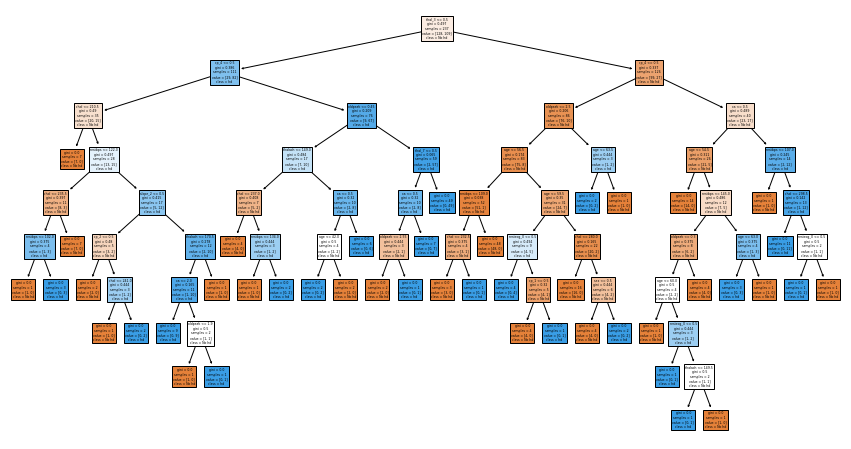

In [23]:
plt.figure(figsize=(15,8))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=['No hd','hd'],
                   filled=True)

In [24]:
confusion_matrix_ = confusion_matrix(y_test,y_pred)

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[25  7]
 [ 9 19]]


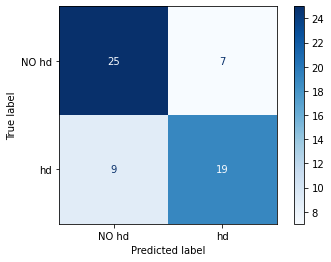

In [25]:
plot_confusion_matrix(model,X_test,y_test,display_labels=['NO hd','hd'],cmap='Blues')
plt.show()

In [26]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  25
False Negatives =  9
False Positives =  7
True Positives =  19


### Accuracy

In [27]:
print("Calculated __________________________")
# calculate the accuracy of the model from the confusion matrix
accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy: ', accuracy)

print("\nScikit-Learn ________________________")
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test,y_pred)

print('Accuracy: ', accuracy_)

Calculated __________________________
Accuracy:  0.7333333333333333

Scikit-Learn ________________________
Accuracy:  0.7333333333333333


In [28]:
print("Calculated __________________________")
precision = np.round(TP/(TP+FP), 2)
recall = np.round(TP/(TP+FN), 2)
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)

print("Precision = ", precision)
print("Recall = ", recall)
print("f1 score = ", f1_score_)

print("\nScikit-Learn ________________________")
precision_ = np.round(precision_score(y_test,y_pred), 2)
recall_ = np.round(recall_score(y_test,y_pred), 2)
f1_score__ = np.round(f1_score(y_test,y_pred), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1 score = ", f1_score__)

Calculated __________________________
Precision =  0.73
Recall =  0.68
f1 score =  0.7

Scikit-Learn ________________________
Precision =  0.73
Recall =  0.68
f1 score =  0.7


In [29]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.68
False Positive Rate =  0.22


### ROC and AUC

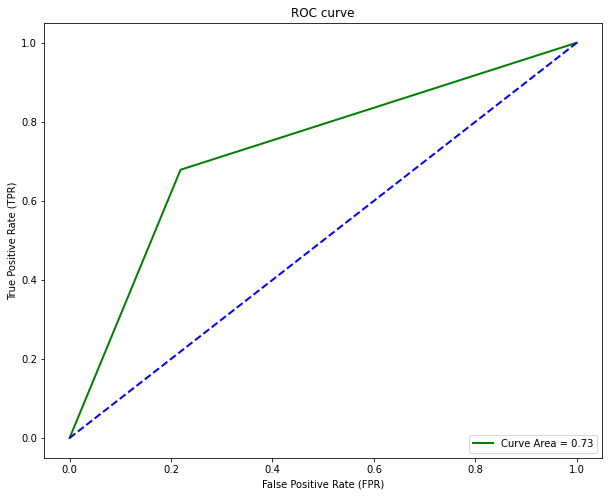

In [30]:
fpr, tpr, thr = roc_curve(y_test,y_pred)
auc = np.round(roc_auc_score(y_test,y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Report

In [31]:
class_report = classification_report(y_test,y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.73      0.68      0.70        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



- 